### Data Shifting Experiment

### Fakeddit
* [Paper](https://arxiv.org/pdf/1911.03854.pdf)

In [1]:
%cd ..

/home/datascience/Data Fusion


In [2]:
import os
import numpy as np
import pandas as pd

from src.classifiers import preprocess_data, process_labels, split_data
from src.classifiers import VQADataset
from torch.utils.data import DataLoader
from src.classifiers import train_early_fusion, train_late_fusion

from utils import normalize_embeddings, modify_and_normalize_embeddings, visualize_embeddings, plot_results

In [3]:
PATH = 'Embeddings_vlm/fakeddit/'
FILE = 'embeddings_clip.csv'
DATASET = 'Fakeddit'

batch_size = 64

output_size = 1
multilabel = False

num_epochs = 50

In [4]:
df = pd.read_csv(os.path.join(PATH, FILE))
df.drop(columns=['hasImage', 'image_url'], inplace=True)
df.head()

,DR_ICDR,DR_2,DR_3,split,image_embedding_0,image_embedding_1,image_embedding_2,image_embedding_3,image_embedding_4,image_embedding_5,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,0,0,0,train,0.012998,-0.012632,0.010281,0.016375,-0.040752,-0.018974,...,-0.054316,0.026362,0.062661,0.023066,-0.023967,-0.013421,0.033898,-0.058343,0.027308,0.011322
1,0,0,0,test,0.013524,-0.017406,0.012482,0.012262,-0.039934,-0.022396,...,-0.054454,0.018202,0.061717,0.022467,-0.011161,-0.011376,0.030134,-0.049021,0.021231,0.010651
2,0,0,0,train,0.036357,-0.018087,-0.001801,0.010425,-0.036854,-0.019405,...,-0.055949,0.011358,0.072995,0.030307,-0.011789,-0.011042,0.042255,-0.057926,0.033326,0.018503
3,0,0,0,train,0.022021,-0.011668,0.010509,0.022121,-0.035989,-0.023524,...,-0.055314,0.002594,0.074490,0.034430,-0.000350,-0.007918,0.042707,-0.047150,0.027270,0.020940
4,0,0,0,test,0.018684,-0.010326,0.004721,0.006435,-0.045767,-0.025992,...,-0.052848,0.021930,0.068045,0.027663,-0.020903,-0.012616,0.037164,-0.051632,0.033358,0.013019


In [5]:
# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column]
image_columns = [column for column in df.columns if 'image' in column]
label_columns = '2_way_label'

### Run Experiments

##################################################  Shift -1  ##################################################


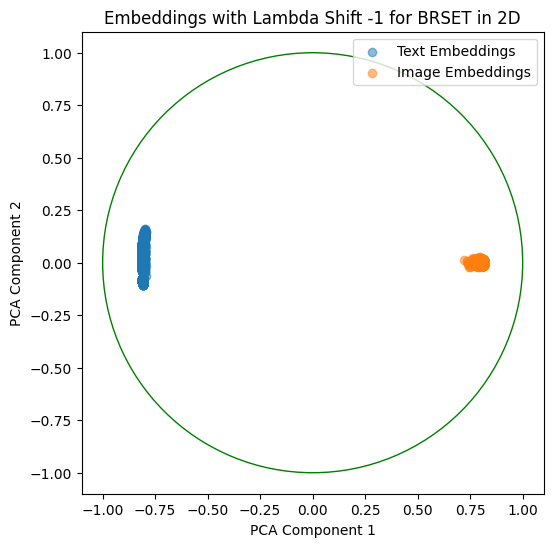

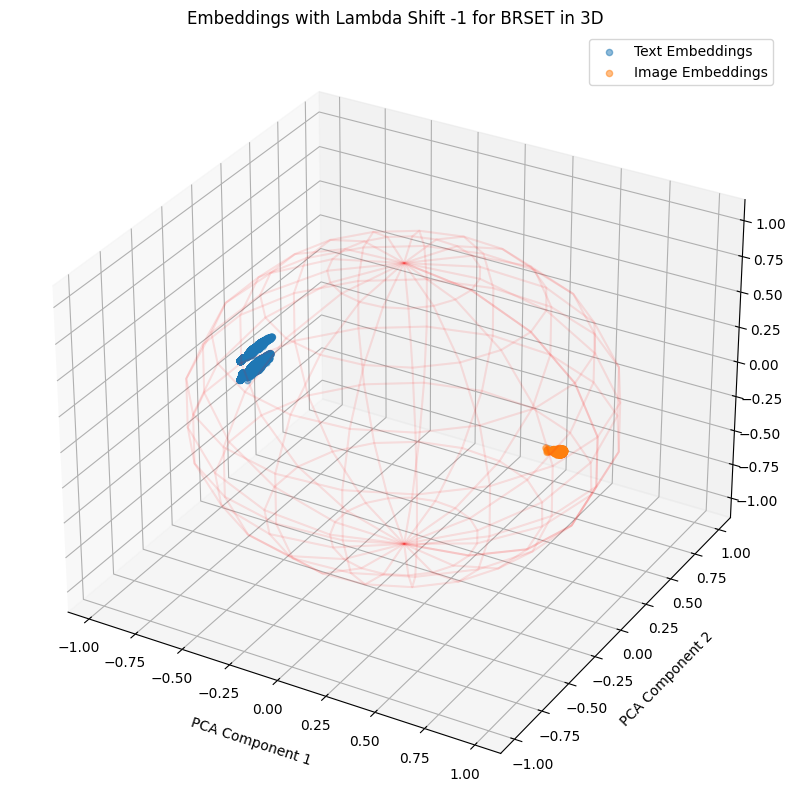

Train Shape: (13012, 1028)
Test Shape: (3254, 1028)
Training Early Fusion Model:
The number of parameters of the model are: 131585
Average Training Time per Epoch: 0.71 seconds
Total Training Time per Epoch: 21.41 seconds
Average Inference Time per Epoch: 0.19 seconds
Total Inference Time per Epoch: 5.72 seconds


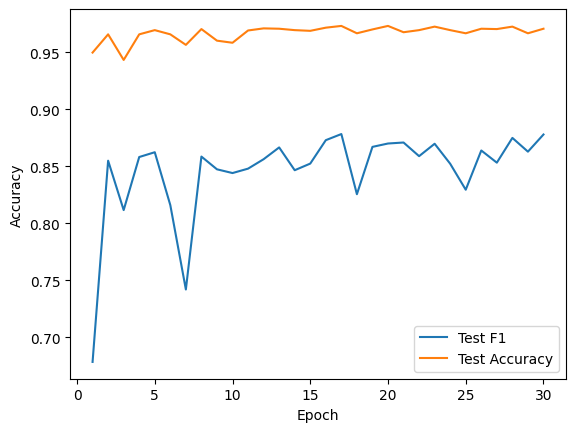

Best Accuracy: {'Acc': 0.9729563614013522, 'F1': 0.8782318201611148, 'Epoch': 17}
Best Macro-F1: {'Acc': 0.9729563614013522, 'F1': 0.8782318201611148, 'Epoch': 17}
Training Late Fusion Model:
The number of parameters of the model are: 66049
Average Training Time per Epoch: 1.63 seconds
Total Training Time per Epoch: 48.83 seconds
Average Inference Time per Epoch: 0.38 seconds
Total Inference Time per Epoch: 11.54 seconds


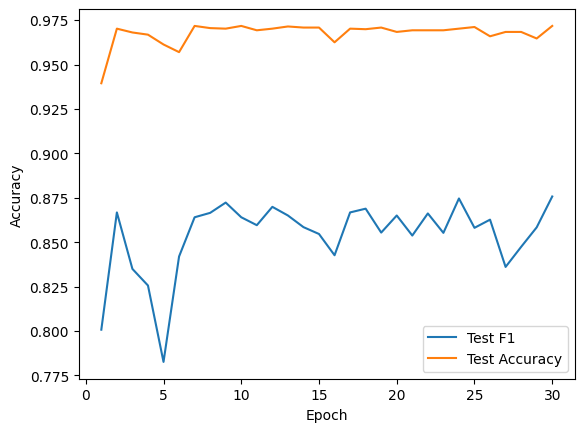

Best Accuracy: {'Acc': 0.9717271051014137, 'F1': 0.8640287050915202, 'Epoch': 7}
Best Macro-F1: {'Acc': 0.9717271051014137, 'F1': 0.8757250149029687, 'Epoch': 30}
##################################################  Shift -0.5  ##################################################


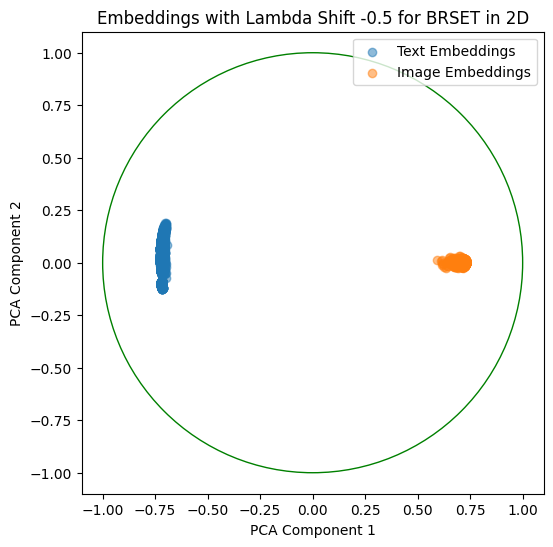

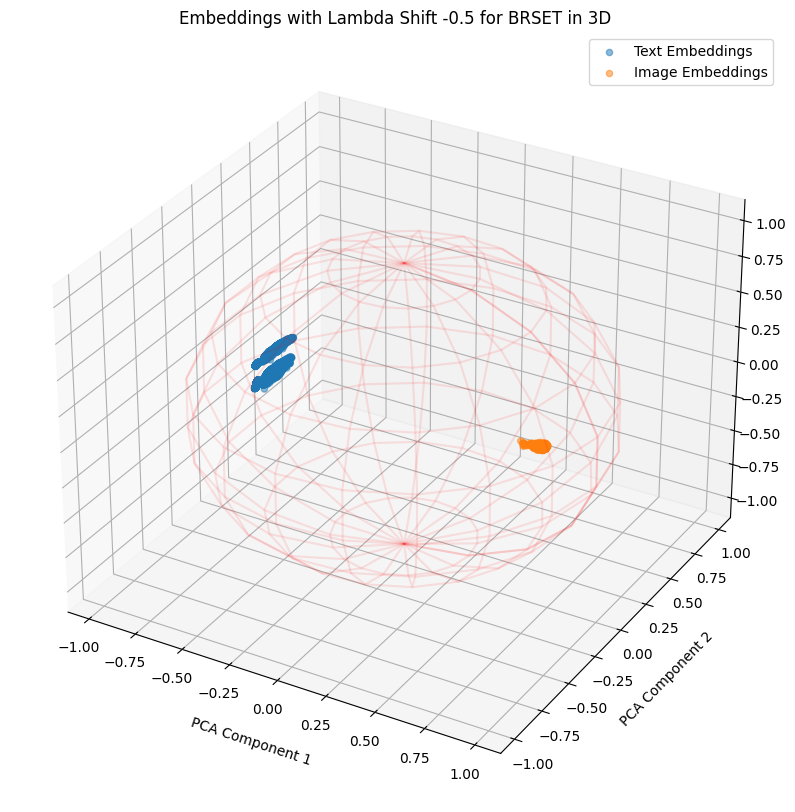

Train Shape: (13012, 1028)
Test Shape: (3254, 1028)
Training Early Fusion Model:
The number of parameters of the model are: 131585
Average Training Time per Epoch: 1.26 seconds
Total Training Time per Epoch: 37.77 seconds
Average Inference Time per Epoch: 0.36 seconds
Total Inference Time per Epoch: 10.86 seconds


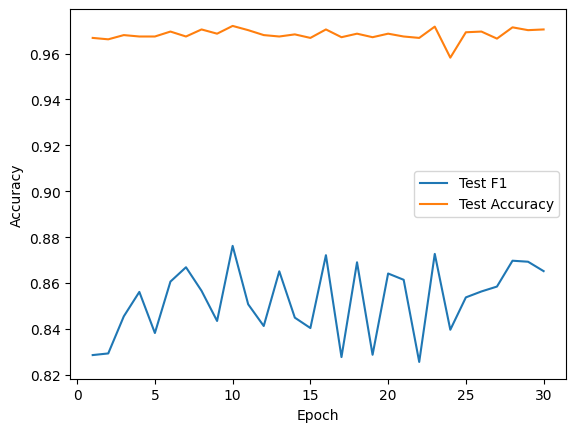

Best Accuracy: {'Acc': 0.9720344191763983, 'F1': 0.8761934268131202, 'Epoch': 10}
Best Macro-F1: {'Acc': 0.9720344191763983, 'F1': 0.8761934268131202, 'Epoch': 10}
Training Late Fusion Model:
The number of parameters of the model are: 66049
Average Training Time per Epoch: 1.70 seconds
Total Training Time per Epoch: 51.01 seconds
Average Inference Time per Epoch: 0.40 seconds
Total Inference Time per Epoch: 12.08 seconds


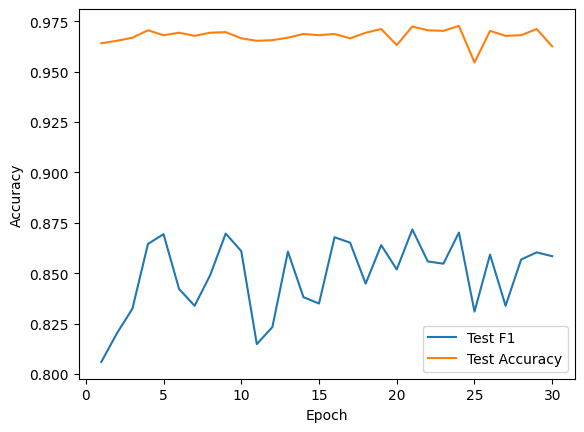

Best Accuracy: {'Acc': 0.9726490473263676, 'F1': 0.870168808433473, 'Epoch': 24}
Best Macro-F1: {'Acc': 0.972341733251383, 'F1': 0.8716984901375278, 'Epoch': 21}
##################################################  Shift 0  ##################################################


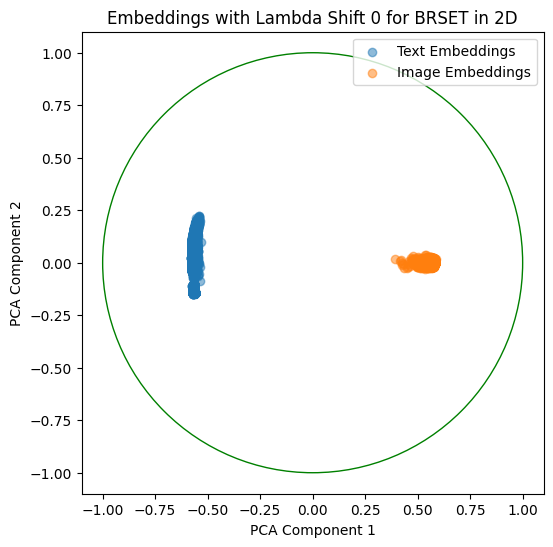

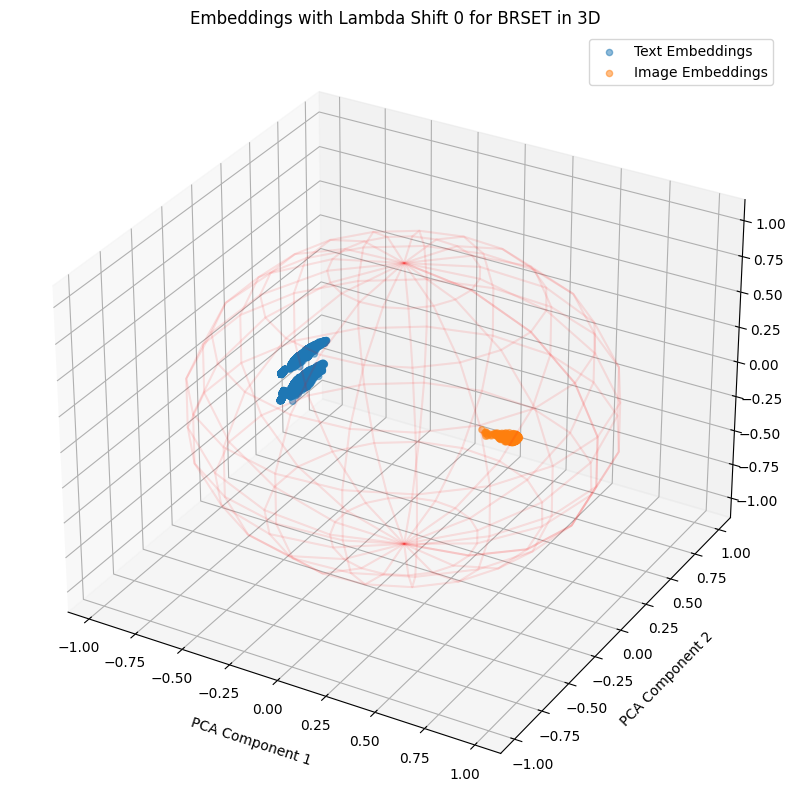

Train Shape: (13012, 1028)
Test Shape: (3254, 1028)
Training Early Fusion Model:
The number of parameters of the model are: 131585
Average Training Time per Epoch: 1.18 seconds
Total Training Time per Epoch: 35.38 seconds
Average Inference Time per Epoch: 0.35 seconds
Total Inference Time per Epoch: 10.36 seconds


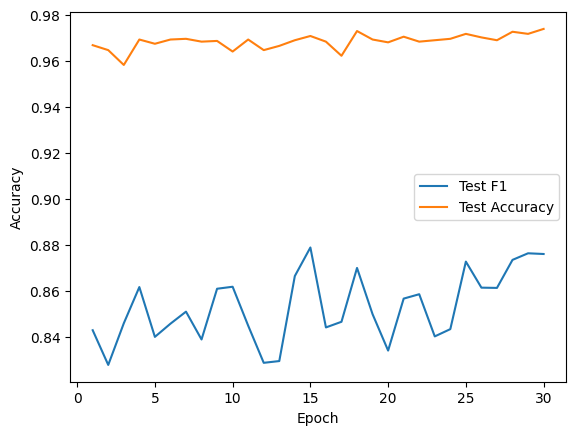

Best Accuracy: {'Acc': 0.9738783036263061, 'F1': 0.8760039181668001, 'Epoch': 30}
Best Macro-F1: {'Acc': 0.9708051628764598, 'F1': 0.8788338923313727, 'Epoch': 15}
Training Late Fusion Model:
The number of parameters of the model are: 66049
Average Training Time per Epoch: 1.74 seconds
Total Training Time per Epoch: 52.13 seconds
Average Inference Time per Epoch: 0.43 seconds
Total Inference Time per Epoch: 12.79 seconds


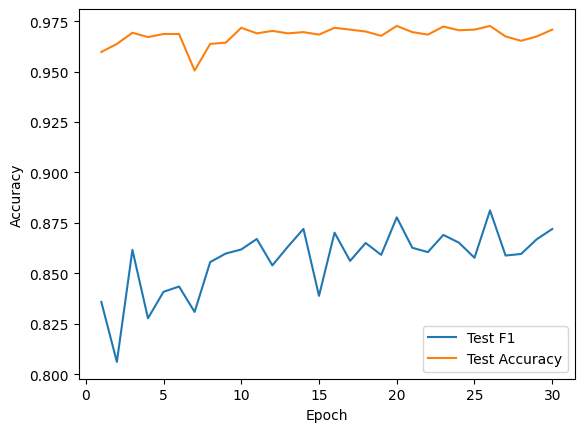

Best Accuracy: {'Acc': 0.9726490473263676, 'F1': 0.8777428659838814, 'Epoch': 20}
Best Macro-F1: {'Acc': 0.9726490473263676, 'F1': 0.8811868433565498, 'Epoch': 26}
##################################################  Shift 0.5  ##################################################


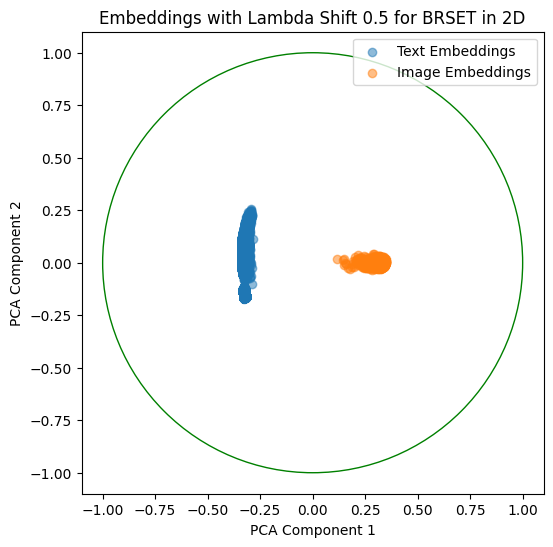

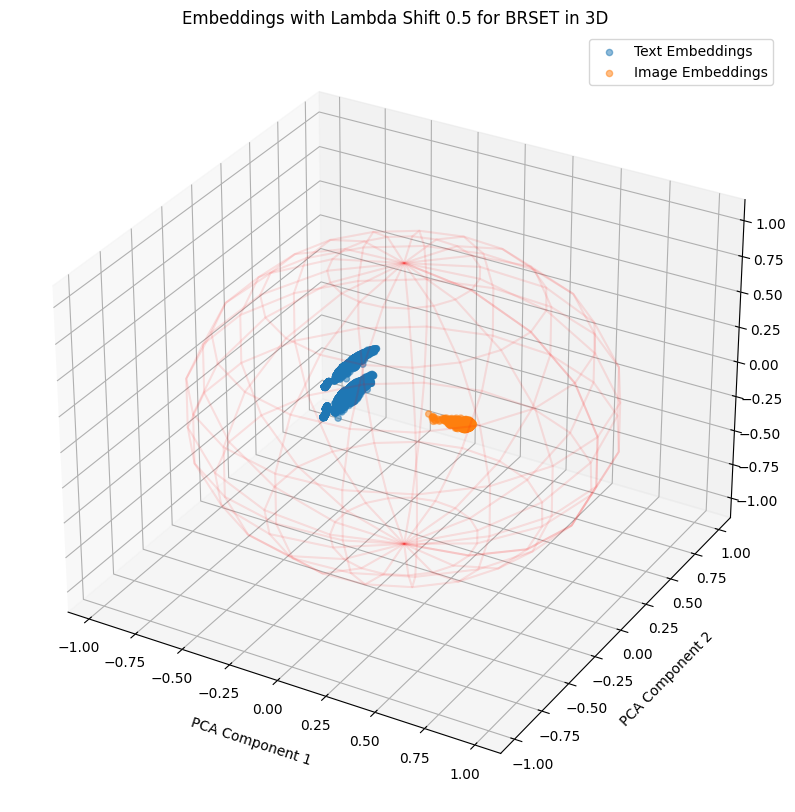

Train Shape: (13012, 1028)
Test Shape: (3254, 1028)
Training Early Fusion Model:
The number of parameters of the model are: 131585
Average Training Time per Epoch: 1.14 seconds
Total Training Time per Epoch: 34.14 seconds
Average Inference Time per Epoch: 0.33 seconds
Total Inference Time per Epoch: 9.92 seconds


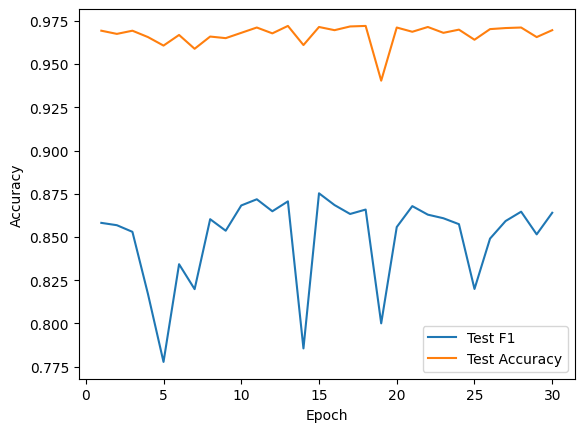

Best Accuracy: {'Acc': 0.9720344191763983, 'F1': 0.8705996228731994, 'Epoch': 13}
Best Macro-F1: {'Acc': 0.9714197910264291, 'F1': 0.8752623072652157, 'Epoch': 15}
Training Late Fusion Model:
The number of parameters of the model are: 66049
Average Training Time per Epoch: 1.78 seconds
Total Training Time per Epoch: 53.38 seconds
Average Inference Time per Epoch: 0.46 seconds
Total Inference Time per Epoch: 13.85 seconds


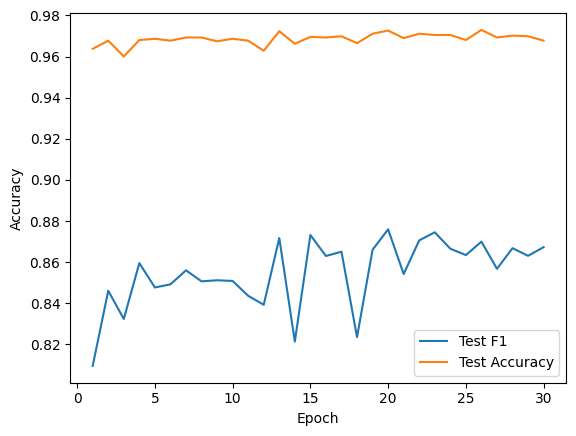

Best Accuracy: {'Acc': 0.9729563614013522, 'F1': 0.8699405005223236, 'Epoch': 26}
Best Macro-F1: {'Acc': 0.9726490473263676, 'F1': 0.8759391651855497, 'Epoch': 20}
##################################################  Shift 1  ##################################################


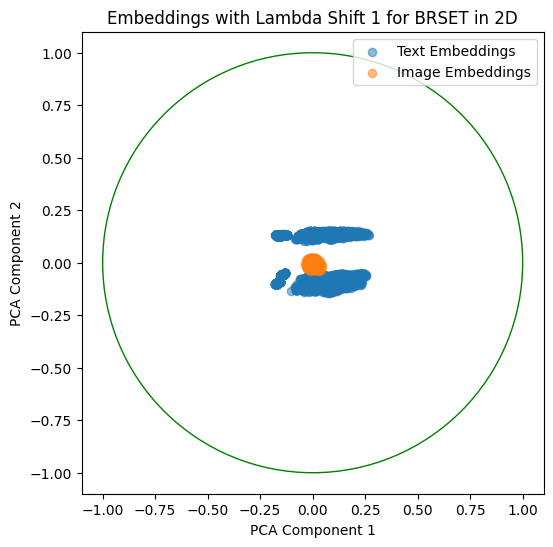

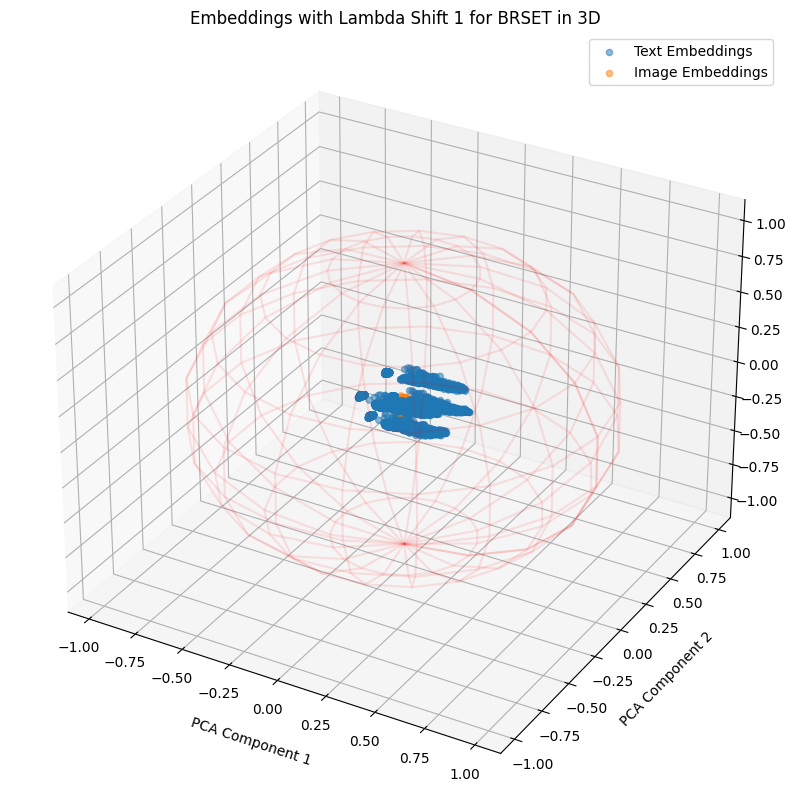

Train Shape: (13012, 1028)
Test Shape: (3254, 1028)
Training Early Fusion Model:
The number of parameters of the model are: 131585
Average Training Time per Epoch: 0.72 seconds
Total Training Time per Epoch: 21.63 seconds
Average Inference Time per Epoch: 0.21 seconds
Total Inference Time per Epoch: 6.22 seconds


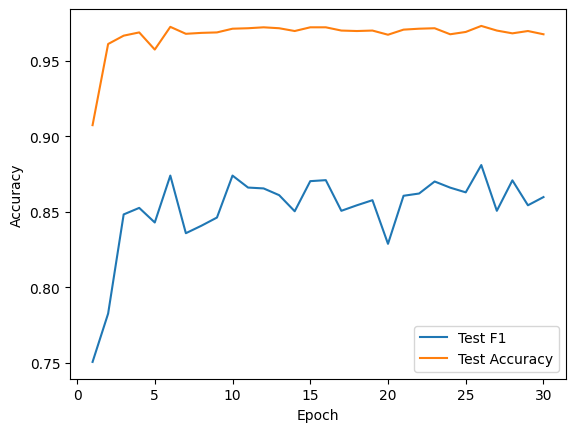

Best Accuracy: {'Acc': 0.9732636754763369, 'F1': 0.8810658024586069, 'Epoch': 26}
Best Macro-F1: {'Acc': 0.9732636754763369, 'F1': 0.8810658024586069, 'Epoch': 26}
Training Late Fusion Model:
The number of parameters of the model are: 66049
Average Training Time per Epoch: 0.82 seconds
Total Training Time per Epoch: 24.56 seconds
Average Inference Time per Epoch: 0.21 seconds
Total Inference Time per Epoch: 6.20 seconds


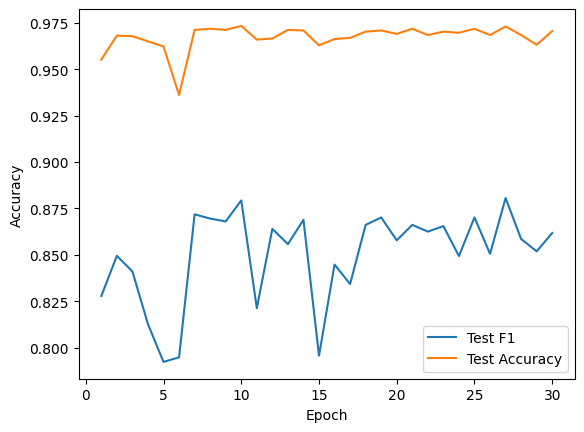

Best Accuracy: {'Acc': 0.9732636754763369, 'F1': 0.8793209356849789, 'Epoch': 10}
Best Macro-F1: {'Acc': 0.9729563614013522, 'F1': 0.8805608574364998, 'Epoch': 27}


In [6]:
# Assuming df is your DataFrame
lambda_shift_values = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # Negative values bring embeddings closer, positive values push them apart

# Normalize initial embeddings
df[text_columns] = normalize_embeddings(df[text_columns].values)
df[image_columns] = normalize_embeddings(df[image_columns].values)

# Dataframe with shifted values:
df_shifted = df.copy()

results = {}

for lambda_shift in lambda_shift_values:
    
    print('#'*50, f' Shift {lambda_shift} ', '#'*50)
    
    # Extract embeddings
    text_embeddings = df[text_columns].values
    image_embeddings = df[image_columns].values
    
    # Modify and normalize embeddings
    text_embeddings_shifted, image_embeddings_shifted = modify_and_normalize_embeddings(text_embeddings, image_embeddings, lambda_shift)
    
    # Update DataFrame with shifted embeddings
    df_shifted[text_columns] = text_embeddings_shifted
    df_shifted[image_columns] = image_embeddings_shifted
    
    # Visualize shifted embeddings
    visualize_embeddings(text_embeddings_shifted, image_embeddings_shifted, f'Embeddings with Lambda Shift {lambda_shift} for {DATASET}', lambda_shift, DATASET)
    
    # Split the data
    train_df, test_df = split_data(df_shifted)
    
    
    # Process and one-hot encode labels for training set
    train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
    test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

    train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
    test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    text_input_size = len(text_columns)
    image_input_size = len(image_columns)

    ### Models:

    # Train early fusion model
    print("Training Early Fusion Model:")
    accuracy, precision, recall, f1, best = train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"early_({lambda_shift})"] = best
    
    # Train late fusion model
    print("Training Late Fusion Model:")
    accuracy, precision, recall, f1, best = train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    
    results[f"late_({lambda_shift})"] = best

In [7]:
print('Results Early Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'early_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'early_({lambda_shift})']['Macro-F1']}")
    
print('Results Late Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'late_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'late_({lambda_shift})']['Macro-F1']}")

Results Early Fusion: 
Shift = -1
Best Accuracy: {'Acc': 0.9729563614013522, 'F1': 0.8782318201611148, 'Epoch': 17}
Best F1: {'Acc': 0.9729563614013522, 'F1': 0.8782318201611148, 'Epoch': 17}
Shift = -0.5
Best Accuracy: {'Acc': 0.9720344191763983, 'F1': 0.8761934268131202, 'Epoch': 10}
Best F1: {'Acc': 0.9720344191763983, 'F1': 0.8761934268131202, 'Epoch': 10}
Shift = 0
Best Accuracy: {'Acc': 0.9738783036263061, 'F1': 0.8760039181668001, 'Epoch': 30}
Best F1: {'Acc': 0.9708051628764598, 'F1': 0.8788338923313727, 'Epoch': 15}
Shift = 0.5
Best Accuracy: {'Acc': 0.9720344191763983, 'F1': 0.8705996228731994, 'Epoch': 13}
Best F1: {'Acc': 0.9714197910264291, 'F1': 0.8752623072652157, 'Epoch': 15}
Shift = 1
Best Accuracy: {'Acc': 0.9732636754763369, 'F1': 0.8810658024586069, 'Epoch': 26}
Best F1: {'Acc': 0.9732636754763369, 'F1': 0.8810658024586069, 'Epoch': 26}
Results Late Fusion: 
Shift = -1
Best Accuracy: {'Acc': 0.9717271051014137, 'F1': 0.8640287050915202, 'Epoch': 7}
Best F1: {'Acc': 

In [ ]:
plot_results(results, lambda_shift_values, DATASET)